# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

$$ w_{new} = w_{old} -\alpha *grad_{w}Q_{batch}(w_{old}) =w_{old} -\alpha * (-\frac{2}{n}\sum_{i=1}^{n} (y_{i}-<x_{i},w_{old}>)*x_{i}+\frac{2}{c}*w_{oldFixed}) $$
$$ w_{old}=(w_{0},w_{1},...,w_{D}) , w_{oldFixed}=(0,w_{1},...,w_{D}) = w_{old}-(w_{0},0,...,0)$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

$$ w_{new} = w_{old} -\alpha *grad_{w}Q_{batch}(w_{old}) =w_{old} -\alpha * (-\frac{1}{n}\sum_{i=1}^{n} (y_{i}*(1-a_{i})+(0-a_{i})(1-y_{i}))*x_{i}+\frac{2}{c}*w_{oldFixed}) $$
**Если упростить, то получится**
$$ w_{new} = w_{old} -\alpha * (-\frac{1}{n}\sum_{i=1}^{n} (y_{i}-a_{i})*x_{i}+\frac{2}{c}*w_{oldFixed}) $$
$$ w_{old}=(w_{0},w_{1},...,w_{D}) , w_{oldFixed}=(0,w_{1},...,w_{D}) = w_{old}-(w_{0},0,...,0)$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

**Пункт 1**
$$ grad_{w}Q(w) = (g_{0},...,g_{D}) $$
$$ g_{k}= \frac{2}{n}\sum_{i=1}^{n} (-y_{i}+<x_{i},w>)*x_{ik} , 0<=k<=D $$
$$ grad_{w}g_{k}= \frac{2}{n}\sum_{i=1}^{n} x_{i}*x_{ik}, 0<=k<=D $$
$$ H(Q(w)) = \frac {2} {n}*X^T*X $$

**Из курса линейной алгебры известно, что**
**Матрица A положительно определена тогда и только тогда, когда существует такая невырожденная матрица B, что:** $$A = B^{T}*B. $$
**Таким образом, если матрица X невырожденная , то гессиан положительно определен**

**Пункт 2**
$$ w = (X^T*X+ \frac {1} {c} *I)^{-1} * x^T*y $$
**Если бы в Х были бы линейно зависимые признаки,то X^T*X была бы необратимой и точного решения не было бы. Регуляризия спасает от этой проблемы**

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

**Обозначим** $$ p1 = p(y_{i} = 1 | x_{i}) , p0 = p(y_{i} = 0 | x_{i}), p0 = 1 - p1, z = a(x_{i}) $$
**Тогда**$$ f(z) = -p1 * log(z) -(1-p1)\log{(1-z)} $$
$$ f'(z) = -\frac {p1} {z} + \frac {1-p1} {1-z} = 0 $$
$$ -p1 + p1*z + z - p1*z = z- p1 = 0 , z= p1 $$
**итак, z=p1 - экстремум. Покажем, что это минимум**
$$ f''(z)=\frac {p1} {z^{2}} - \frac {p1-1} {(z-1)^{2}} = \frac {-2*p1*z+p1+z^{2}} {z^{2}*(z-1)^{2}}$$
$$ f''(p1) = \frac {p1-p1^{2}} {p1^{2}*(p1-1)^{2}} >0  $$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

**В регуляризации не нужно использовать свободный член, w0 - отвечает за значение в точке, где все признаки нулевые.
L1 и L2 регуляризация штрафует модели за большие веса у признаков, а w0 ни на какой признак не умножается**

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    X1 = X.copy()
    y1 = y.copy()
    
    if shuffle:
        rand_ind = np.random.permutation(len(y))
        for i in range(len(y)):
            X1[i] = X[rand_ind[i]]
            y1[i] = y[rand_ind[i]]
            
            
    for i in range(X.shape[0] // batch_size):
        X_batch = X1[batch_size*i:batch_size*(i+1):1,:]
        y_batch = y1[batch_size*i:batch_size*(i+1):1]
        yield (X_batch, y_batch)
        
    if (X.shape[0] % batch_size != 0):
        X_batch = X1[(i+1)*batch_size::,:]
        y_batch = y1[(i+1)*batch_size::]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size = 1 , th = 0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.th = th
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n = X_batch.shape[0]
        if self.model_type == 'lin_reg':
            #z = (X_batch @ self.weights - y_batch) 
            #loss = (1 / n) * (z.T @ z)
            y_pred = X_batch @ self.weights
            loss = np.mean((y_pred-y_batch)**2)
        else:
            p = sigmoid(X_batch @ self.weights)
            loss = - np.mean(y_batch * np.log(p) + (1 - y_batch)*np.log(1 - p))  
        reg = 1/self.C * np.sum(self.weights[1::]**2)     
        return loss + reg 
    
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        if self.model_type == 'lin_reg':
            z = (X_batch @ self.weights - y_batch ) 
            loss_grad = 2 / X_batch.shape[0] * (z @ X_batch)  
        else:
            p = sigmoid(X_batch @ self.weights)
            z = (p - y_batch ) 
            loss_grad = 1 / X_batch.shape[0] * (z @ X_batch)
            #loss_grad = - 1 / X_batch.shape[0] * ((y_batch * (1 - p) + (0 - p)*(1 - y_batch)) @ X_batch) 
        reg = (2 / self.C) * np.hstack((np.array([0]),self.weights[1::]))
        return loss_grad + reg 
    
    
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= (self.alpha * new_grad)
    
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        # Нужно инициализровать случайно веса
        self.weights = np.random.normal(size = X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X,y, True , self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_hat = np.ones(X.shape[0])
        if self.model_type == 'lin_reg':
            z = X @ self.weights
            y_hat[z < self.th] = 0   
        else:
            p = sigmoid(X @ self.weights)
            y_hat[p < self.th] = 0
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    clf.fit(X, y)
    x_ax = np.linspace(X.min(), X.max(), num = 100)
    y_ax = np.array(
        (clf.weights[0] + clf.weights[1] * x_ax))
    plt.plot(x_ax, y_ax)
    print(clf.weights)
    return clf.weights

[-4.18372003  0.985863   -0.96865516]


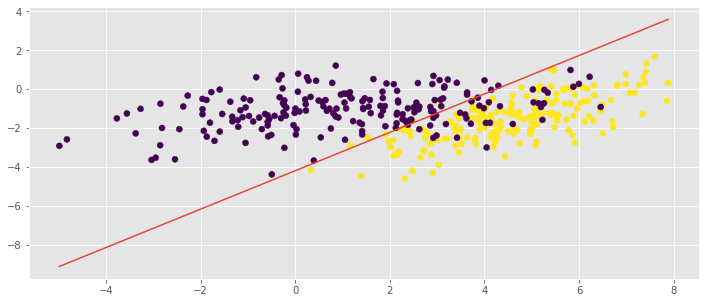

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.01, max_epoch=30, model_type = 'log_reg')
plot_decision_boundary(clf)

plt.scatter(X[:,0], X[:,1], c=y)

In [10]:
from sklearn.metrics import f1_score
f1_score(clf.predict(X), y)


0.9018691588785046

In [11]:
clf.errors_log['loss']

[3.976066749536971,
 3.589154074248078,
 2.788928332898017,
 4.122656065631976,
 0.5782415660432566,
 0.09109048971033724,
 0.012258871128136617,
 0.05232742191549912,
 1.8767122663566767,
 0.42431355137259685,
 0.033353732686845085,
 0.009532816897150364,
 2.2676387187334663,
 1.4638140147274634,
 0.05916115565096648,
 1.3260443213334596,
 0.008846024463441012,
 0.3531572509484429,
 0.877994426875333,
 0.009207619335770094,
 1.4853591227500953,
 0.011984909693292928,
 0.021597143072785978,
 0.021971600774114218,
 0.014120416103918464,
 2.981445598497454,
 0.013799697961762785,
 0.008937835975521523,
 4.5890314783769535,
 0.013642872620276789,
 0.8108814008971947,
 0.029649467077053505,
 2.7761176956436606,
 4.0418677917180235,
 1.3191465634331287,
 4.295080511997861,
 0.03209490356195332,
 0.13599537903516543,
 0.10470306111040521,
 0.03307385007742817,
 1.0827887934284817,
 1.1054321050250882,
 4.00644253670601,
 0.027198256715738518,
 0.03286101297180997,
 0.03156817693110939,
 1.62

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [12]:
from sklearn.datasets import make_classification

In [13]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [14]:
def mean_loss(N, loss):
    res = []
    for i in range(len(loss)//N):
        res.append(np.mean(loss[i*N:(i+1)*N:]))
    if len(loss) % N != 0:
        res.append(np.mean(loss[(i+1)*N::]))
    return res    

In [15]:
clf = MySGDClassifier(batch_generator, C = 1000, alpha = 0.1, max_epoch=5, model_type = 'lin_reg',batch_size = 20)
clf.fit(X, y)
l1 = mean_loss(100, clf.errors_log['loss'])

clf = MySGDClassifier(batch_generator, C = 1000, alpha = 0.01, max_epoch=5, model_type = 'lin_reg',batch_size = 20)
clf.fit(X, y)
l2 = mean_loss(100, clf.errors_log['loss'])

clf = MySGDClassifier(batch_generator, C = 1000, alpha = 0.001, max_epoch=5, model_type = 'lin_reg',batch_size = 20)
clf.fit(X, y)
l3 = mean_loss(100, clf.errors_log['loss'])

clf = MySGDClassifier(batch_generator, C = 1000, alpha = 0.0001, max_epoch=5, model_type = 'lin_reg',batch_size = 20)
clf.fit(X, y)
l4 = mean_loss(100, clf.errors_log['loss'])

(0.0, 1.0)

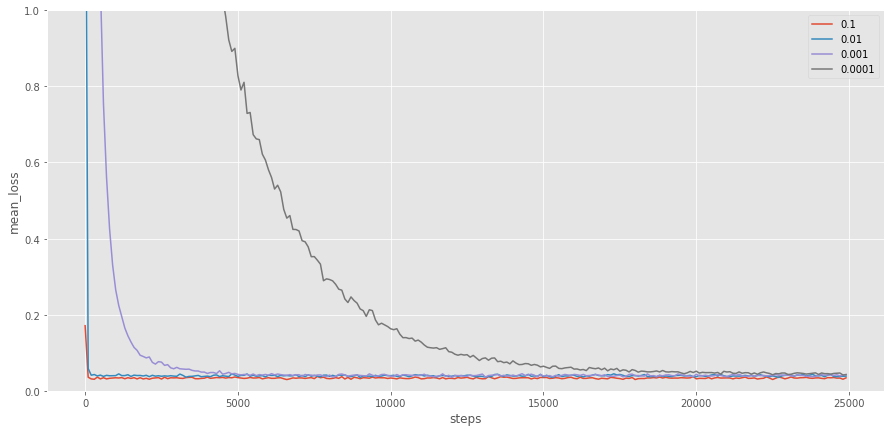

In [16]:
fig, ax = plt.subplots(figsize=(15, 7))

step_count = np.arange(len(l1))*100
ax.plot(step_count, l1)
ax.plot(step_count, l2)
ax.plot(step_count, l3)
ax.plot(step_count, l4)
ax.legend(['0.1', '0.01', '0.001', '0.0001'])
ax.set_ylabel('mean_loss')
ax.set_xlabel('steps')
plt.ylim(0, 1)

In [17]:
clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.5, max_epoch=5, model_type = 'log_reg',batch_size = 20)
clf.fit(X, y)
l1 = mean_loss(100, clf.errors_log['loss'])

clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.1, max_epoch=5, model_type = 'log_reg',batch_size = 20)
clf.fit(X, y)
l2 = mean_loss(100, clf.errors_log['loss'])

clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.01, max_epoch=5, model_type = 'log_reg',batch_size = 20)
clf.fit(X, y)
l3 = mean_loss(100, clf.errors_log['loss'])

clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.001, max_epoch=5, model_type = 'log_reg',batch_size = 20)
clf.fit(X, y)
l4 = mean_loss(100, clf.errors_log['loss'])

clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.0001, max_epoch=5, model_type = 'log_reg',batch_size = 20)
clf.fit(X, y)
l5 = mean_loss(100, clf.errors_log['loss'])

(0.0, 1.0)

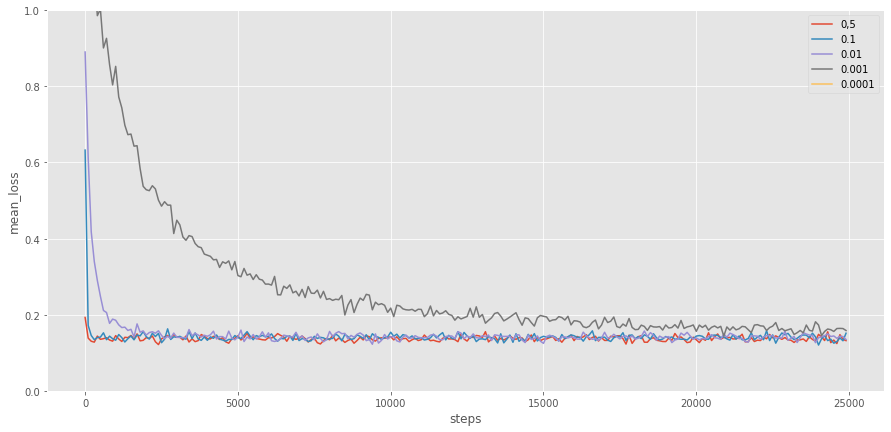

In [18]:
fig, ax = plt.subplots(figsize=(15, 7))

step_count = np.arange(len(l1))*100
ax.plot(step_count, l1)
ax.plot(step_count, l2)
ax.plot(step_count, l3)
ax.plot(step_count, l4)
ax.plot(step_count, l5)
ax.legend(['0,5','0.1', '0.01', '0.001', '0.0001'])
ax.set_ylabel('mean_loss')
ax.set_xlabel('steps')
plt.ylim(0, 1)

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

**При очень маленьких альфа сходится медленнее, оптимальное значение альфа 0.1, когда альфа большое, то ошибка побольше**

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

<ipython-input-7-086a8952c628>:50: RuntimeWarning: divide by zero encountered in log
  loss = - np.mean(y_batch * np.log(p) + (1 - y_batch)*np.log(1 - p))
<ipython-input-7-086a8952c628>:50: RuntimeWarning: invalid value encountered in multiply
  loss = - np.mean(y_batch * np.log(p) + (1 - y_batch)*np.log(1 - p))
<ipython-input-7-086a8952c628>:9: RuntimeWarning: overflow encountered in exp
  sigm_value_x = 1 / (1 + np.exp(-x))
<ipython-input-7-086a8952c628>:51: RuntimeWarning: overflow encountered in double_scalars
  reg = 1/self.C * np.sum(self.weights[1::]**2)
c:\users\денис\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-7-086a8952c628>:51: RuntimeWarning: overflow encountered in square
  reg = 1/self.C * np.sum(self.weights[1::]**2)
<ipython-input-7-086a8952c628>:49: RuntimeWarning: overflow encountered in matmul
  p = sigmoi

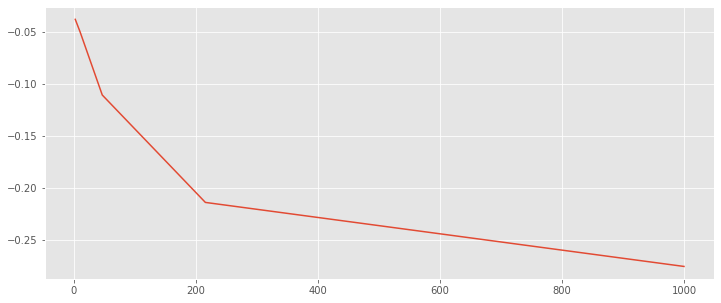

In [19]:
w_mean = []
c_val = []

for c in np.logspace(3, -3, 10):
    clf = MySGDClassifier(batch_generator, C = c, alpha = 0.5, max_epoch=5, model_type = 'log_reg',batch_size = 20)
    clf.fit(X, y)
    c_val.append(c)
    w_mean.append(np.mean(clf.weights[1::]))
    
plt.plot(c_val, w_mean)    

c:\users\денис\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-7-086a8952c628>:47: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred-y_batch)**2)
<ipython-input-7-086a8952c628>:51: RuntimeWarning: overflow encountered in double_scalars
  reg = 1/self.C * np.sum(self.weights[1::]**2)
<ipython-input-7-086a8952c628>:51: RuntimeWarning: overflow encountered in square
  reg = 1/self.C * np.sum(self.weights[1::]**2)
<ipython-input-7-086a8952c628>:64: RuntimeWarning: overflow encountered in matmul
  loss_grad = 2 / X_batch.shape[0] * (z @ X_batch)
<ipython-input-7-086a8952c628>:64: RuntimeWarning: invalid value encountered in matmul
  loss_grad = 2 / X_batch.shape[0] * (z @ X_batch)
<ipython-input-7-086a8952c628>:80: RuntimeWarning: invalid value encountered in subtract
  self.weights -= (self.alpha * new_grad)
<ipython-input

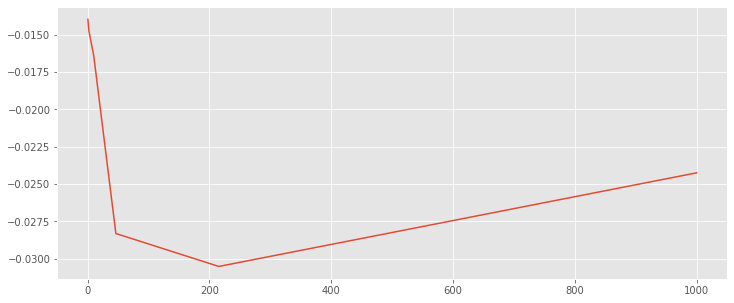

In [20]:
w_mean = []
c_val = []

for c in np.logspace(3, -3, 10):
    clf = MySGDClassifier(batch_generator, C = c, alpha = 0.1, max_epoch=5, model_type = 'lin_reg',batch_size = 20)
    clf.fit(X, y)
    c_val.append(c)
    w_mean.append(np.mean(clf.weights[1::]))
    
plt.plot(c_val, w_mean) 

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

**В логистической регрессии - да, а в линейной уменьшились не очень сильно**

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [21]:
doc_to_title = {}
with open('docs_titles.tsv',encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [22]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [23]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [24]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train

array([[ 0.28851817,  0.64985075,  0.34754853, ...,  0.40832322,
        -0.2798612 , -0.25235498],
       [ 1.83850779,  2.06407761,  2.42519734, ...,  0.40832322,
         0.44747927,  0.49035139],
       [-0.48647664, -0.29296716, -0.17186368, ..., -0.30881898,
        -0.2798612 , -0.25235498],
       ...,
       [-1.26147145, -1.23578506, -1.21068809, ..., -1.02596118,
        -1.00720167, -0.99506135],
       [ 1.06351298, -0.29296716, -0.69127588, ..., -0.30881898,
        -0.2798612 , -0.25235498],
       [-0.09897923, -0.29296716, -0.17186368, ..., -0.30881898,
        -0.2798612 , -0.25235498]])

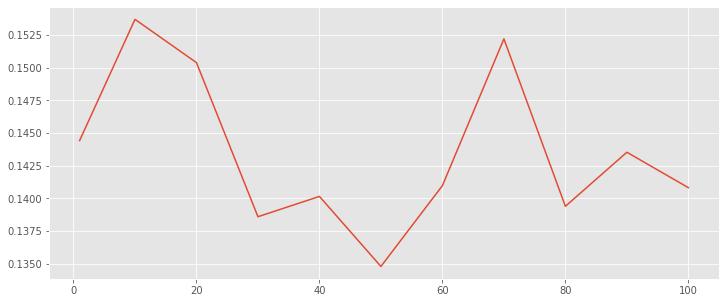

In [26]:
res = []
size = [1, 10 ,20, 30, 40, 50 ,60 , 70 , 80 ,90, 100]
for b in size:
    clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.01, max_epoch=5, model_type = 'log_reg',batch_size = b)
    clf.fit(X, y)
    res.append(mean_loss(100, clf.errors_log['loss'])[-1])
      
plt.plot(size, res)        

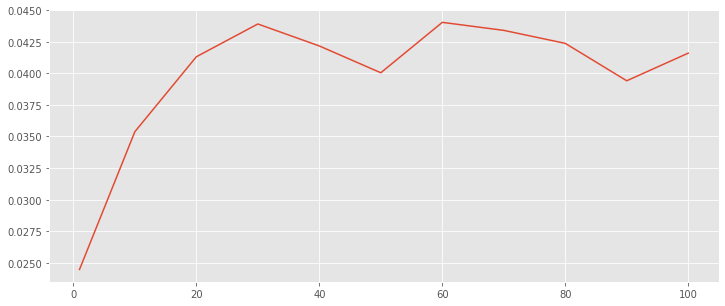

In [27]:
res = []
size = [1, 10 ,20, 30, 40, 50 ,60 , 70 , 80 ,90, 100]
for b in size:
    clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.01, max_epoch=5, model_type = 'lin_reg',batch_size = b)
    clf.fit(X, y)
    res.append(mean_loss(100, clf.errors_log['loss'])[-1])
      
plt.plot(size, res)   

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [28]:
from sklearn.model_selection import GroupKFold, cross_val_score, GridSearchCV

In [29]:
param_grid = {'C': [10, 100, 1000],
              'alpha': [0.005, 0.01, 0.05, 0.1],
              'max_epoch': [5, 10, 12, 15]}

In [32]:
clf = MySGDClassifier(batch_generator, model_type = 'lin_reg')
grid_search = GridSearchCV(clf, param_grid, cv=GroupKFold(n_splits=3), scoring = make_scorer(f1_score))

In [33]:
grid_search.fit(X_train, y_train, groups_train)

c:\users\денис\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[  1   1   1 ... 129 129 129] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-7-086a8952c628>:47: RuntimeWarning: overflow encountered in square
  loss = np.mean((y_pred-y_batch)**2)
c:\users\денис\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-7-086a8952c628>:51: RuntimeWarning: overflow encountered in square
  reg = 1/self.C * np.sum(self.weights[1::]**2)
<ipython-input-7-086a8952c628>:64: RuntimeWarning: overflow encountered in multiply
  loss_grad = 2 / X_batch.shape[0] * (z @ X_batch)
<ipython-input-7-086a8952c628>:80: RuntimeWarning: invalid value encountered in subtrac

GridSearchCV(cv=GroupKFold(n_splits=3),
             estimator=MySGDClassifier(batch_generator=<function batch_generator at 0x0000025860BC25E0>),
             param_grid={'C': [10, 100, 1000],
                         'alpha': [0.005, 0.01, 0.05, 0.1],
                         'max_epoch': [5, 10, 12, 15]},
             scoring=make_scorer(f1_score))

In [34]:
grid_search.best_params_

{'C': 10, 'alpha': 0.01, 'max_epoch': 12}

In [35]:
best_lin = grid_search.best_estimator_

In [36]:
clf = MySGDClassifier(batch_generator, model_type = 'log_reg', batch_size = 50)
grid_search = GridSearchCV(clf, param_grid, cv=GroupKFold(n_splits=3), scoring = make_scorer(f1_score))

In [37]:
grid_search.fit(X_train, y_train, groups_train)

c:\users\денис\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[  1   1   1 ... 129 129 129] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-7-086a8952c628>:50: RuntimeWarning: divide by zero encountered in log
  loss = - np.mean(y_batch * np.log(p) + (1 - y_batch)*np.log(1 - p))
<ipython-input-7-086a8952c628>:50: RuntimeWarning: invalid value encountered in multiply
  loss = - np.mean(y_batch * np.log(p) + (1 - y_batch)*np.log(1 - p))


GridSearchCV(cv=GroupKFold(n_splits=3),
             estimator=MySGDClassifier(batch_generator=<function batch_generator at 0x0000025860BC25E0>,
                                       batch_size=50, model_type='log_reg'),
             param_grid={'C': [10, 100, 1000],
                         'alpha': [0.005, 0.01, 0.05, 0.1],
                         'max_epoch': [5, 10, 12, 15]},
             scoring=make_scorer(f1_score))

In [38]:
grid_search.best_params_

{'C': 100, 'alpha': 0.01, 'max_epoch': 5}

In [39]:
best_log = grid_search.best_estimator_

In [40]:
cross_val_score(best_lin, X_train, y_train, groups=groups_train, scoring=make_scorer(f1_score)).mean()

0.56346227189695

In [41]:
cross_val_score(best_log, X_train, y_train, groups=groups_train, scoring=make_scorer(f1_score)).mean()

0.5448617502491989

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [42]:
param_grid = {'th':[0.2, 0.3, 0.4, 0.5, 0.6]}

In [46]:
clf = MySGDClassifier(batch_generator, C = 100, alpha = 0.01, max_epoch = 5 , batch_size = 50 ,model_type = 'log_reg')
grid_search = GridSearchCV(clf, param_grid, cv=GroupKFold(n_splits=3), scoring = make_scorer(f1_score))

In [47]:
grid_search.fit(X_train, y_train, groups_train)

c:\users\денис\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[  1   1   1 ... 129 129 129] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


GridSearchCV(cv=GroupKFold(n_splits=3),
             estimator=MySGDClassifier(C=100,
                                       batch_generator=<function batch_generator at 0x0000025860BC25E0>,
                                       batch_size=50, max_epoch=5,
                                       model_type='log_reg'),
             param_grid={'th': [0.2, 0.3, 0.4, 0.5, 0.6]},
             scoring=make_scorer(f1_score))

In [48]:
grid_search.best_params_

{'th': 0.3}

In [49]:
best_log = grid_search.best_estimator_

In [50]:
cross_val_score(best_log, X_train, y_train, groups=groups_train, scoring=make_scorer(f1_score)).mean()

0.5866803507238725

In [51]:
param_grid = {'th':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7 , 0.8]}

In [52]:
clf = MySGDClassifier(batch_generator, C = 10, alpha = 0.01, max_epoch = 12 , model_type = 'lin_reg')
grid_search = GridSearchCV(clf, param_grid, cv=GroupKFold(n_splits=3), scoring = make_scorer(f1_score))

In [53]:
grid_search.fit(X_train, y_train, groups_train)

c:\users\денис\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[  1   1   1 ... 129 129 129] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


GridSearchCV(cv=GroupKFold(n_splits=3),
             estimator=MySGDClassifier(C=10,
                                       batch_generator=<function batch_generator at 0x0000025860BC25E0>,
                                       max_epoch=12),
             param_grid={'th': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring=make_scorer(f1_score))

In [54]:
grid_search.best_params_

{'th': 0.3}

In [55]:
best_lin = grid_search.best_estimator_

In [56]:
cross_val_score(best_lin, X_train, y_train, groups=groups_train, scoring=make_scorer(f1_score)).mean()

0.6110384380746143

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [57]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [58]:
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print(X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [59]:
X_test_scaled = scaler.transform(X_test)
y_pred = best_lin.predict(X_test_scaled)
y_pred = y_pred.astype(int)

sub = pd.DataFrame({'pair_id': np.asarray(
    test_data['pair_id']), 'target': y_pred})
sub = sub.set_index(['pair_id'])
sub.to_csv('sub_1.csv')

In [60]:
X_test_scaled = scaler.transform(X_test)
y_pred = best_log.predict(X_test_scaled)
y_pred = y_pred.astype(int)

sub = pd.DataFrame({'pair_id': np.asarray(
    test_data['pair_id']), 'target': y_pred})
sub = sub.set_index(['pair_id'])
sub.to_csv('sub_2.csv')

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

**Домашка сложная, но полезная:) Но если бы дедлайн между первой и второй домашкой был бы хотя бы 2 недели, то было бы совсем хорошо**